#**1. Import thư viện cần thiết**

In [ ]:
#Import thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

#**2. Load dataset và xem trước dữ liệu**

In [ ]:
# Load dataset
df = pd.read_csv("WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


#**3. Kích thước dataset**

In [ ]:
df.shape

(1143, 13)

#**4. Kiểm tra các giá trị duy nhất của cột 'quality'**

In [ ]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

#**5. Ma trận tương quan**

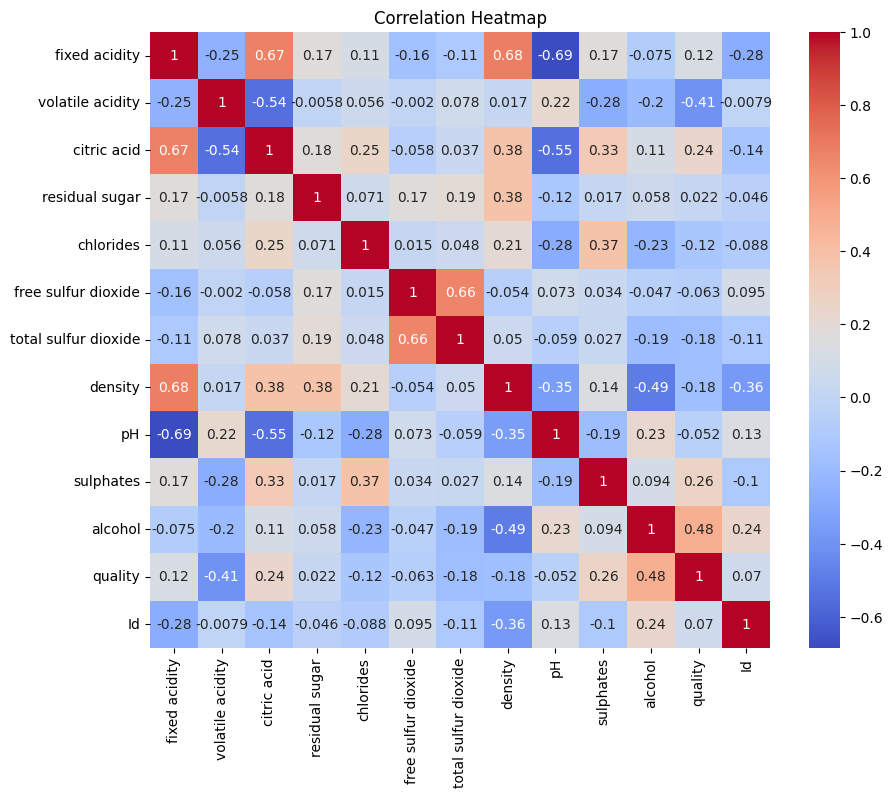

In [ ]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#**6. Vẽ biểu đồ hình tròn cho phần trăm từng mức chất lượng rượu**

   quality  count    percent
0        3      6   0.524934
1        4     33   2.887139
2        5    483  42.257218
3        6    462  40.419948
4        7    143  12.510936
5        8     16   1.399825


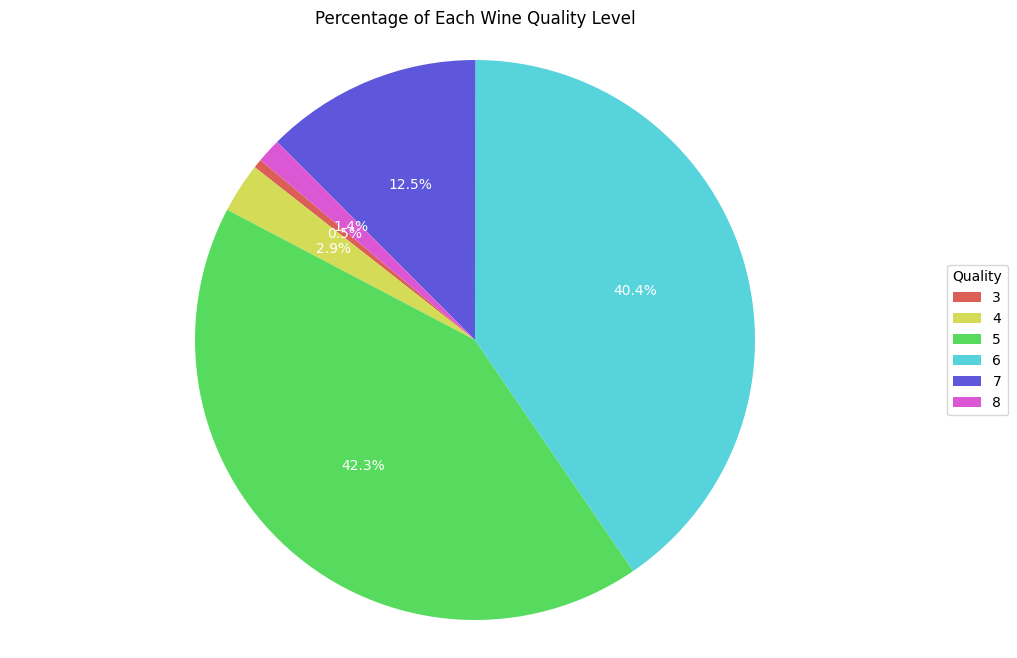

In [ ]:
# Tính toán số lượng từng mức chất lượng rượu
count_quality = df['quality'].value_counts().sort_index()

# Tính tỷ lệ phần trăm của từng mức chất lượng rượu
total = len(df['quality'])
percent_quality = (count_quality / total) * 100

# Chuyển đổi thành DataFrame
quality_df = pd.DataFrame({
    'quality': count_quality.index,
    'count': count_quality.values,
    'percent': percent_quality.values
})

print(quality_df)

# Tạo bảng màu
colors = sns.color_palette("hls", len(quality_df))
plt.figure(figsize=(12, 8))
patches, texts, autotexts = plt.pie(quality_df['percent'], autopct='%1.1f%%', startangle=140, colors=colors)

# Định dạng các phần trăm trên biểu đồ
for autotext in autotexts:
    autotext.set_color('white')

# Chú thích, tên biểu đồ.
plt.legend(patches, quality_df['quality'], title="Quality", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Percentage of Each Wine Quality Level')
plt.axis('equal')
plt.show()

In [ ]:
# Hiển thị các thông số thống kê cơ bản của dataset
#df[["fixed acidity", "volatile acidity",	"citric acid",	"residual sugar",	"chlorides",	"free sulfur dioxide",	"total sulfur dioxide",	"density",	"pH",	"sulphates",	"alcohol"]].describe()

#**7️. Tiền xử lý dữ liệu**

In [ ]:
# Kiểm tra các giá trị Null
print(df.isnull().sum())
# Mã hóa dữ liệu
le = LabelEncoder()
df['quality'] = le.fit_transform(df['quality'])
df.head()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2,4


#**8. Chuẩn hóa dữ liệu với StandardScaler**

In [ ]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
features = df.drop('quality', axis=1)
features = scaler.fit_transform(features)
target = df['quality']

#**9️. Chia dữ liệu thành tập huấn luyện và kiểm tra**

In [ ]:
# Tách dữ liệu
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

#**10. Huấn luyện mô hình SVC**

In [ ]:
# Khởi tạo mô hình SVM với kernel linear
svc_model = SVC(C=50, kernel='linear', random_state=42)

# Huấn luyện mô hình trên tập train
svc_model.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred = svc_model.predict(X_test)

# Tính độ chính xác của mô hình SVc
accuracy = accuracy_score(y_test, y_pred)
print("Initial Model with SVM Accuracy: {:.2f}%".format(accuracy * 100))


Initial Model with SVM Accuracy: 62.01%


# **1️1️. Regularization**

In [ ]:
# Sử dụng Regularization bằng cách giảm giá trị C (C nhỏ hơn giúp tránh overfitting)
svm_model_reg = SVC(C=1, gamma = 'auto', kernel='rbf', random_state=42)

# Huấn luyện mô hình trên tập train
svm_model_reg.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred_reg = svm_model_reg.predict(X_test)

# Tính độ chính xác sau khi áp dụng Regularization
accuracy_reg = accuracy_score(y_test, y_pred_reg)
print("Regularized SVM Model Accuracy: {:.2f}%".format(accuracy_reg * 100))


Regularized SVM Model Accuracy: 65.50%


#**1️2️. Hyperparameter Tuning - Tối ưu hóa tham số cho SVM**

In [ ]:
# Định nghĩa bộ tham số để tối ưu hóa
param_grid = {
    'C': [0.1, 10, 50],  # Điều chỉnh Regularization
    'kernel': ['linear', 'rbf', 'poly'],  # So sánh các kernel
    'gamma': ['scale', 'auto']  # Điều chỉnh độ phức tạp
}

# Sử dụng GridSearchCV để tìm tham số tốt nhất
grid_search_svm = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Huấn luyện GridSearchCV
grid_search_svm.fit(X_train, y_train)



Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 10, 50], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=1)

In [ ]:
# Lấy bộ tham số tối ưu
best_params = grid_search_svm.best_params_
print("Best parameters found:", best_params)

Best parameters found: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


#**1️3️. Huấn luyện lại mô hình với tham số tối ưu**

In [ ]:
# Khởi tạo mô hình với tham số tốt nhất
best_svm = SVC(**best_params, random_state=42)

# Huấn luyện mô hình tối ưu
best_svm.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred_best = best_svm.predict(X_test)

# Tính độ chính xác
best_svm_accuracy = accuracy_score(y_test, y_pred_best)
print("Optimized SVM Model Accuracy: {:.2f}%".format(best_svm_accuracy * 100))


Optimized SVM Model Accuracy: 68.56%


#**1️4️. Xây dựng Pipeline cho SVM**

In [ ]:
# Xây dựng Pipeline với SVM và StandardScaler
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Chuẩn hóa dữ liệu
    ('svm', SVC(C=10, gamma='auto', kernel='rbf', random_state=42))  # SVM với tham số cố định
])

# Huấn luyện Pipeline
pipeline.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred_pipeline = pipeline.predict(X_test)

# Tính độ chính xác
accuracy_pipeline = accuracy_score(y_test, y_pred_pipeline)
print("Pipeline Model Accuracy: {:.2f}%".format(accuracy_pipeline * 100))


Pipeline Model Accuracy: 68.12%
